In [2]:
cd ..

/Users/maxcohen/Documents/Python/NYC Data/NYPD-arrests


In [3]:
ls

2010 Census Tracts/
ACS5yearBK/
CCRB Data Layout Table.xlsx
NYC Street Centerline (CSCL)/
NYC_Police_Precincts_2020/
NYPD-repository/
NYPD_Arrest_Historic_DataDictionary.xlsx
NYPD_Arrests_Data__Historic_.csv
NYPD_Criminal_Court_Summons__Historic_.csv
allegations_20200726939.csv
nyc_2010censusblocks_2020policeprecincts (1).csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import geopandas as gpd
from scipy.stats import gaussian_kde
import seaborn as sns
from shapely.geometry import shape, Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
import plotly.express as px

In [6]:
df = pd.read_csv('NYPD_Criminal_Court_Summons__Historic_.csv')

In [7]:
df.dtypes

SUMMONS_KEY                int64
SUMMONS_DATE              object
OFFENSE_DESCRIPTION       object
LAW_SECTION_NUMBER        object
LAW_DESCRIPTION           object
SUMMONS_CATEGORY_TYPE     object
AGE_GROUP                 object
SEX                       object
RACE                      object
JURISDICTION_CODE          int64
BORO                      object
PRECINCT_OF_OCCUR          int64
X_COORDINATE_CD          float64
Y_COORDINATE_CD          float64
Latitude                 float64
Longitude                float64
Lon_Lat                   object
dtype: object

In [17]:
df['SUMMONS_DATE'] = pd.to_datetime(df['SUMMONS_DATE'])

In [18]:
df['dayofyear'] = df['SUMMONS_DATE'].apply(lambda x: x.timetuple().tm_yday)

In [25]:
df['dayofyear'].max()

366

In [29]:
arrestsXdate = df['SUMMONS_DATE'].value_counts().reset_index().rename(columns={'index':'date',
                                                                              'dayofyear':'count'})

In [30]:
arrestsXdate = arrestsXdate.sort_values(by='date')

In [33]:
arrestsXdate_index = arrestsXdate.set_index('date')

In [34]:
d7_rol_arr = arrestsXdate_index.rolling(window=7, center=True).mean()

In [35]:
d365_rol_arr = arrestsXdate_index.rolling(window=365, center=True).mean()

In [38]:
arrestsXdate_index.rename(columns={'SUMMONS_DATE':'count'},inplace=True)

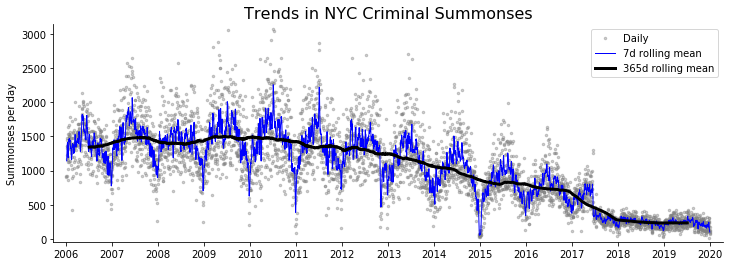

In [40]:
d7_rol_arr = arrestsXdate_index.rolling(window=7, center=True).mean()

d365_rol_arr = arrestsXdate_index.rolling(window=365, center=True).mean()

#number of arrests by day
fig,ax = plt.subplots(figsize=(12,4))

ax.plot(arrestsXdate_index['count'], marker='.', markersize=5, 
        alpha=.4, linestyle='None', color='grey', label='Daily')

ax.plot(d7_rol_arr['count'], color='blue', label='7d rolling mean', linewidth=1)

ax.plot(d365_rol_arr['count'], color='black', label='365d rolling mean', linewidth=3)

ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel("Summonses per day")
ax.set_title('Trends in NYC Criminal Summonses',fontsize=16)
plt.margins(.02)
plt.savefig('NYPD-repository/figs/trends_NYC_criminal_summonses.png', dpi=500, bbox_inches='tight')
plt.show()